In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
import datetime
import seaborn as sns 
from scipy import stats
from scipy.stats import norm
from scipy.stats import skew
from itertools import tee
from sklearn.preprocessing import StandardScaler
sns.set(style = "whitegrid", color_codes = True)
sns.set(font_scale = 1)

In [5]:
def symbol_to_path(symbol):
    return 'data/{}.csv'.format(symbol)

def add_symbol_to_data_frame(data_frame, symbol, start, end):
    return data_frame.join(
      get_data_frame(symbol, start, end, dropna = True))

In [6]:
def get_data_frame(symbol, start, end, dropna = False):
    date_range = pd.date_range(start, end)
    data_frame = pd.DataFrame(index= date_range)
    
    symbol_data_frame = pd.read_csv(symbol_to_path(symbol),
                             index_col = 'Date',
                             parse_dates = True,
                             usecols = ['Date', 'Adj Close'],
                             na_values = ['NaN'])
    
    symbol_data_frame = symbol_data_frame.rename(columns = {'Adj Close': symbol})
    
    data_frame = data_frame.join(symbol_data_frame)

    if (dropna == True):
        return data_frame.dropna()
    else:
        return data_frame

In [7]:
def spy_data_frame(start, end):
    return get_data_frame('SPY', start, end, dropna=True)

In [8]:
def get_data_frame_for_symbols(symbols, start_date, end_date):
    df = spy_data_frame(start_date, end_date)
    
    for symbol in symbols:
        df_symbol = get_data_frame(symbol, start_date, end_date, dropna= True)
        df = pd.concat([df,df_symbol], axis =1)

    return df

In [9]:
## Plot stock prices 
def plot_data(df, title, xlabel="Date", ylabel="Value"):
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [10]:
def pairwise(iterable):
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

In [25]:
def test():
    start_date = '2017-01-01'
    end_date = '2017-09-01'

    data_frame = spy_data_frame(start_date, end_date)
    data_frame.plot()
    plt.show()


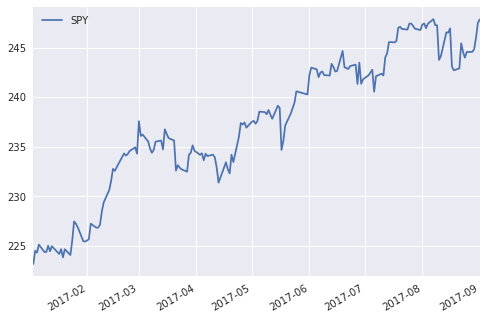

In [26]:
if __name__ == '__main__':
    test()